D:\anaconda3\lib\site-packages\ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

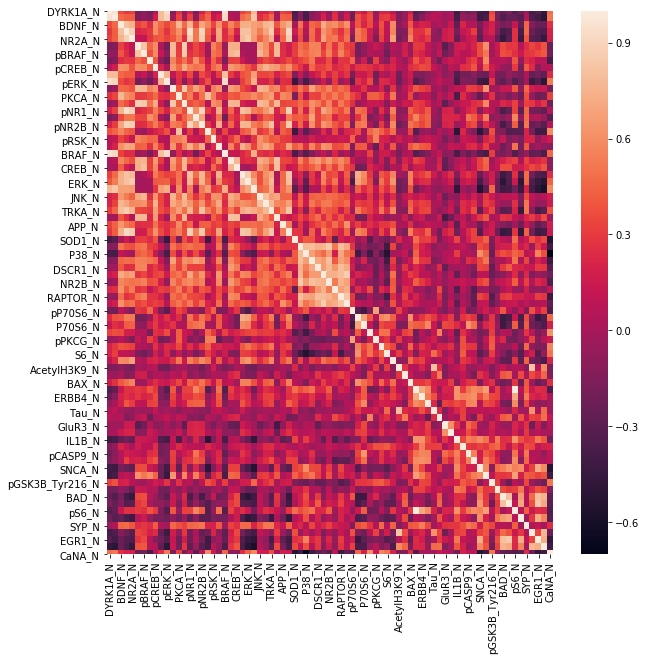

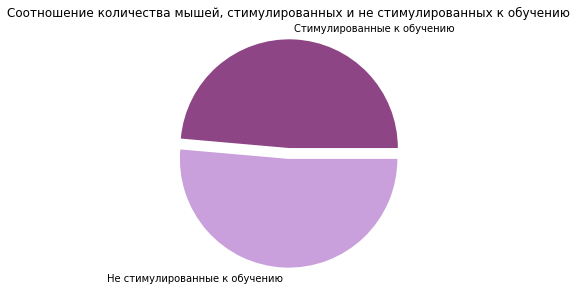

In [20]:
#Импортируем библиотеки
from sklearn import linear_model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Открываем датасет
data = pd.read_csv ('Data_Cortex_Nuclear.csv')
data.head()

#Значения колонок можно узнать на сайте, с которого скачан датасет
'''MouseID - идентификационный номер мыши. В эксперименте участвовали 72 мыши, и для каждой было проведено 15 измерений
От DYRK1A_N до CaNA_N - названия 77 разных белков, экспрессию которых измеряли
Genotype - генотип: Control (c) - здоровая мышь, Ts65Dn (t) - мышь с синдромом Дауна
Treatment - инъекции: Memantine - мемантина (используется в терапии болезни Альцгеймера), Saline - солевого раствора
Behavior - поведение: C/S - стимулированные к обучению, S/C - не стимулированные к обучению
class - комбинация Genotype, Treatment и Behaviour
'''

#Можно построить график, иллюстрирующий корреляцию между эскпрессией разных белков
plt.figure(figsize=(10, 10))
_ = data.corr()
sns.heatmap(_)

#Можно построить диаграмму, показывающую, на какие доли выборку разбивают различные переменные. Например, поведение.
fig = plt.figure(figsize=(5, 5))
b = data[['Behavior']].copy()
learn = b[b=='C/S'].count()
notlearn = b[b=='S/C'].count()

bDistr = [learn, notlearn]
plt.title('Соотношение количества мышей, стимулированных и не стимулированных к обучению')
Pie = plt.pie(bDistr,
              labels=['Cтимулированные к обучению', 'Не стимулированные к обучению'],
              shadow=False, colors=['#8e4585', '#c9a0dc'], explode=(0.1, 0))


#С помощью линейной регрессии создадим модель статистической взаимосвязи между экспрессией белка DYRK1A_N и поведением мыши.
#DYRK1A - это киназа, которая, вероятно, играет роль в сигнальных путях, регулирующих пролиферацию клеток, и участвует в развитии мозга.
#Ген DYRK1A расположен в критически важном для синдрома Дауна регионе, и, предположительно, отвечает за дефекты способности к обучению у больных.

x = np.array(data['DYRK1A_N']).reshape((-1, 1))
pd.get_dummies(data['Behavior']) #Переводим значения категориальной переменной из текстовых в числовые
y = data['Behavior']

model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
y_pred = model.predict(x)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)
print('predicted response:', y_pred, sep='\n')

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5) #Тренировка модели
model.fit(x_train, y_train) 
y_pred = model.predict(x_test) #Предсказывание

model.score(x_test, y_test) #Проверка качества модели: расчет среднеквадратического отклонения